# Results of the pipeline

74


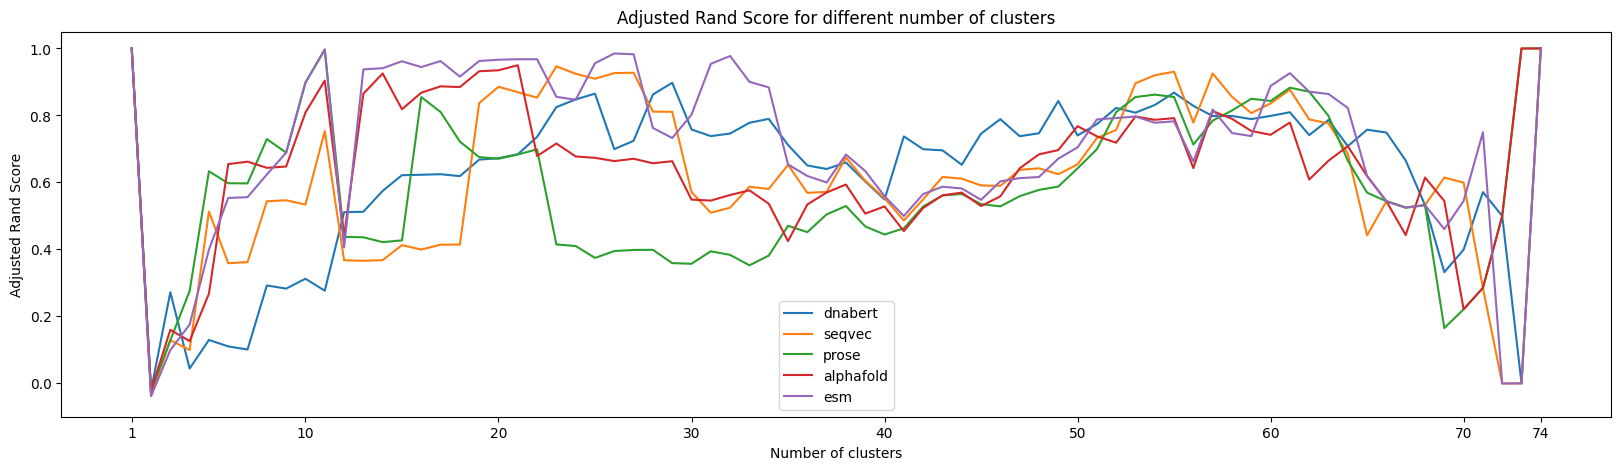

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.673513  0.849302  0.848111   0.898867  0.889565
         50               0.759230  0.855175  0.860017   0.890974  0.943029
         all              0.759230  0.854653  0.844076   0.890974  0.924383
average  10               0.782886  0.806722  0.847776   0.826953  0.889995
         50               0.807871  0.852792  0.853485   0.872251  0.927002
         all              0.807871  0.852292  0.847776   0.871702  0.935453
sum      10               0.633050  0.834572  0.858422   0.850355  0.845080
         50               0.665478  0.859986  0.860017   0.896833  0.929200
         all              0.677163  0.859986  0.855024   0.896833  0.929200
max      10               0.726092  0.746755  0.791176   0.735839  0.834004
         50               0.839536  0.923100  0.831886   0.851189  0.965213
         all              0.837611  0.880037  0.826345   0.853100  0.967325

In [2]:
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_hemoglobin.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fix, _ = plt.subplots(figsize=(20, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 10)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['max']['50']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['max']['50']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['sum']['50']['prose'], label='prose')
plt.plot(X, results_dict_ars['pca']['10']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend()
plt.show()
r
# plt.savefig(Path(PATH).stem + '.eps')
